# Project Description
This project is focused on the Prediction of Concrete compressive strength(MPa, megapascals) based different commonents
The dependent Variable is Concrete compressive strength(MPa, megapascals), while the independent variables are:
1) Cement (component 1)(kg in a m^3 mixture)

2) Blast Furnace Slag (component 2)(kg in a m^3 mixture)	
3) Fly Ash (component 3)(kg in a m^3) 

4) Water (component 4)(kg in a m^3 mixture)	
5) Superplasticizer (component 5)(kg in a m^3 mixture)	
6) Coarse Aggregate (component 6)(kg in a m^3 mixture)	
7) Fine Aggregate (component 7)(kg in a m^3 mixture)	

Different LightGBM models will be developed based on different age of curing.


# Import Important Libraries

In [11]:
pip install skillmetrics

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import fast_ml
from sklearn.preprocessing  import OneHotEncoder
from fast_ml import eda
from sklearn.model_selection import train_test_split
import os
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score
import math
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import hydroeval as he
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor 
from fast_ml.model_development import train_valid_test_split
%matplotlib inline
from lightgbm import LGBMRegressor as lgbm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor as rf
from scipy.stats import pearsonr
import numpy as np
import pickle

# Data Preparation and Assessment

In [13]:
#Load and View Data
filepath='Concrete_Data.xlsx'
df=pd.read_excel(filepath,engine='openpyxl')  
df.head(5)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Concrete_Compressive_Strength,Age_day
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,79.986111,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,61.887366,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,40.269535,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,41.052780,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,44.296075,360


In [14]:
df.columns = df.columns.str.replace(' ', '_')

In [15]:
df.to_excel('Concrete_Data.xlsx', index=False)

In [16]:
from fast_ml import eda

# One of the most useful dataframe summary view
summary_df = eda.df_info(df)
summary_df

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Cement,float64,Numerical,280,"[540.0, 332.5, 198.6, 266.0, 380.0, 475.0, 427...",0,0.0
Blast_Furnace_Slag,float64,Numerical,187,"[0.0, 142.5, 132.4, 114.0, 95.0, 47.5, 190.0, ...",0,0.0
Fly_Ash,float64,Numerical,163,"[0.0, 96.67, 94.58, 100.52, 125.4, 121.62, 118...",0,0.0
Water,float64,Numerical,205,"[162.0, 228.0, 192.0, 146.0, 170.1, 175.5, 153...",0,0.0
Superplasticizer,float64,Numerical,155,"[2.5, 0.0, 10.1, 8.6, 16.5, 18.6, 23.4, 8.9, 3...",0,0.0
Coarse_Aggregate,float64,Numerical,284,"[1040.0, 1055.0, 932.0, 978.4, 1047.0, 971.0, ...",0,0.0
Fine_Aggregate,float64,Numerical,304,"[676.0, 594.0, 825.5, 670.0, 806.9, 850.6, 800...",0,0.0
Concrete_Compressive_Strength,float64,Numerical,938,"[79.98611076, 61.88736575999999, 40.269535256,...",0,0.0
Age_day,int64,Numerical,14,"[28, 270, 365, 360, 90, 180, 3, 7, 56, 91]",0,0.0


In [17]:
#simple Descriptive Statistics of Data
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast_Furnace_Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly_Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse_Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine_Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Concrete_Compressive_Strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225
Age_day,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000



Correlation matrix:
                                 Cement  Blast_Furnace_Slag   Fly_Ash  \
Cement                         1.000000           -0.275193 -0.397475   
Blast_Furnace_Slag            -0.275193            1.000000 -0.323569   
Fly_Ash                       -0.397475           -0.323569  1.000000   
Water                         -0.081544            0.107286 -0.257044   
Superplasticizer               0.092771            0.043376  0.377340   
Coarse_Aggregate              -0.109356           -0.283998 -0.009977   
Fine_Aggregate                -0.222720           -0.281593  0.079076   
Concrete_Compressive_Strength  0.497833            0.134824 -0.105753   
Age_day                        0.081947           -0.044246 -0.154370   

                                  Water  Superplasticizer  Coarse_Aggregate  \
Cement                        -0.081544          0.092771         -0.109356   
Blast_Furnace_Slag             0.107286          0.043376         -0.283998   
Fly_Ash    

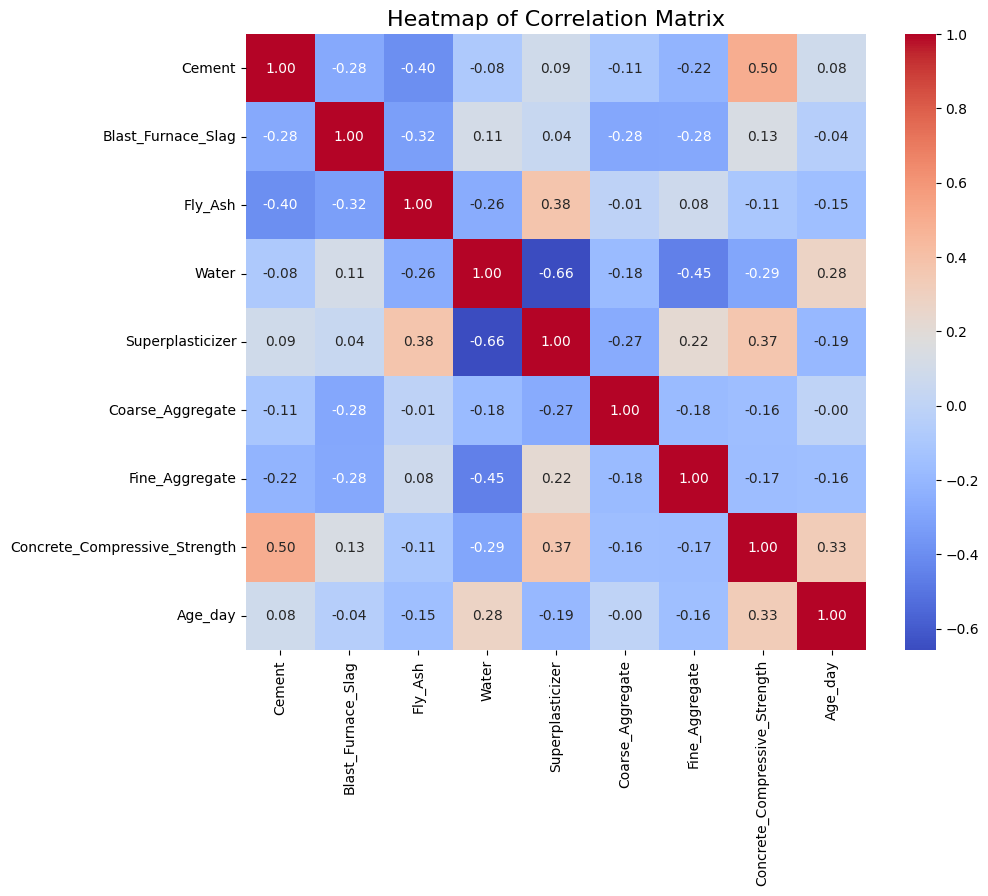

In [18]:
corr = df.corr()
print("\nCorrelation matrix:")
print(corr)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.show()


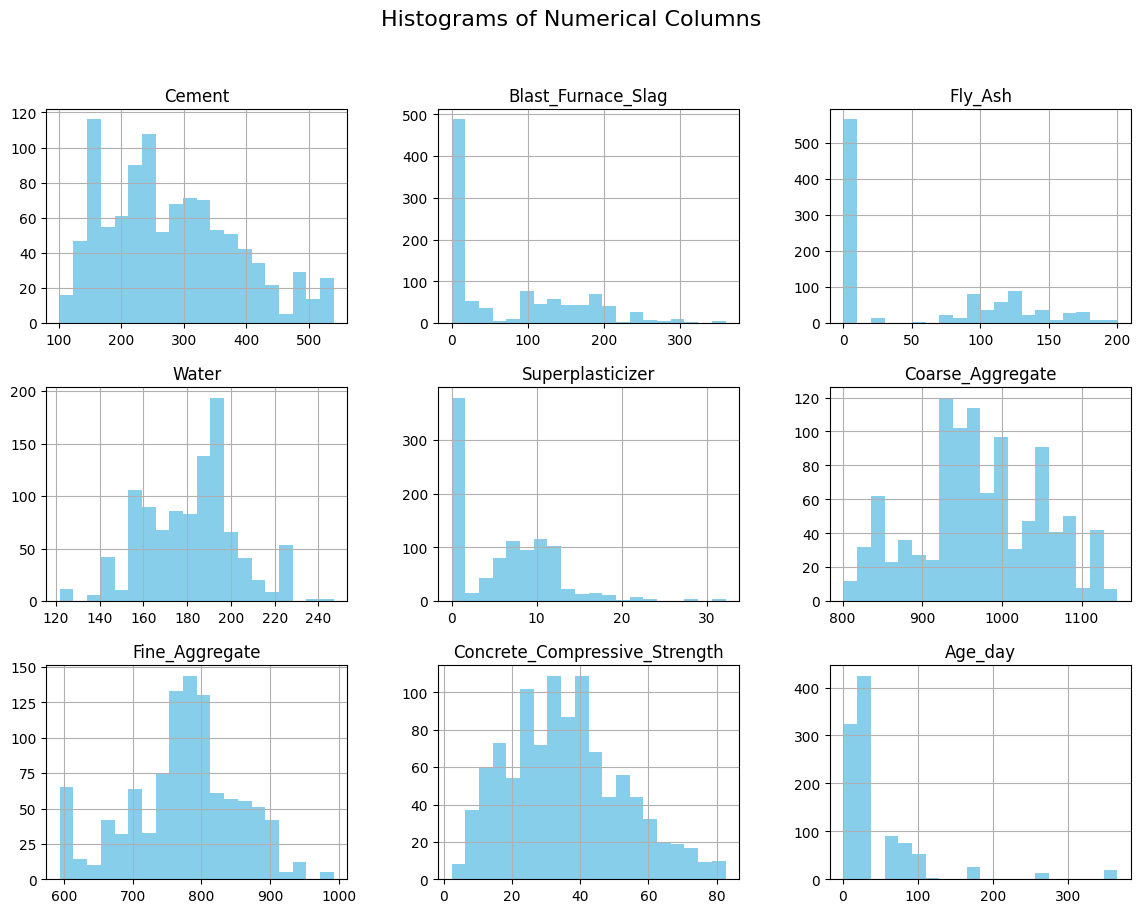

In [19]:
# Histogram for numerical columns
df.hist(bins=20, figsize=(14, 10), color='skyblue')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()


## Exploratory Analysis

In [23]:
df

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Concrete_Compressive_Strength,Age_day
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,79.986111,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,61.887366,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,40.269535,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,41.052780,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,44.296075,360
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,44.284354,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,31.178794,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,23.696601,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,32.768036,28


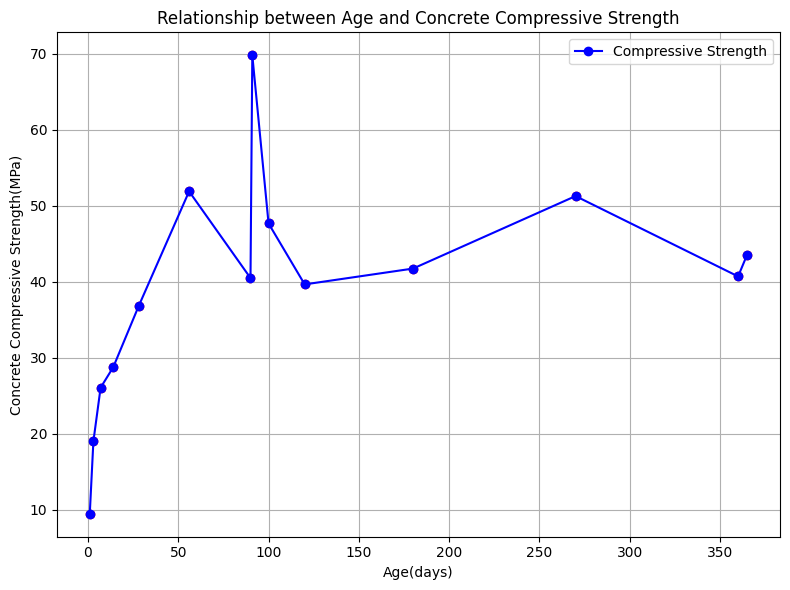

In [24]:
compressive_strength_and_age=pd.pivot_table(data=df,index='Age_day',values= 'Concrete_Compressive_Strength')
# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(compressive_strength_and_age.index, compressive_strength_and_age.values, marker='o', linestyle='-', color='b', label='Compressive Strength')

plt.xlabel('Age(days)')
plt.ylabel('Concrete Compressive Strength(MPa)')
plt.title('Relationship between Age and Concrete Compressive Strength')
plt.grid(True)
plt.legend()

plt.scatter(compressive_strength_and_age.index, compressive_strength_and_age.values, color='red')

# Show plot
plt.tight_layout()
plt.show()

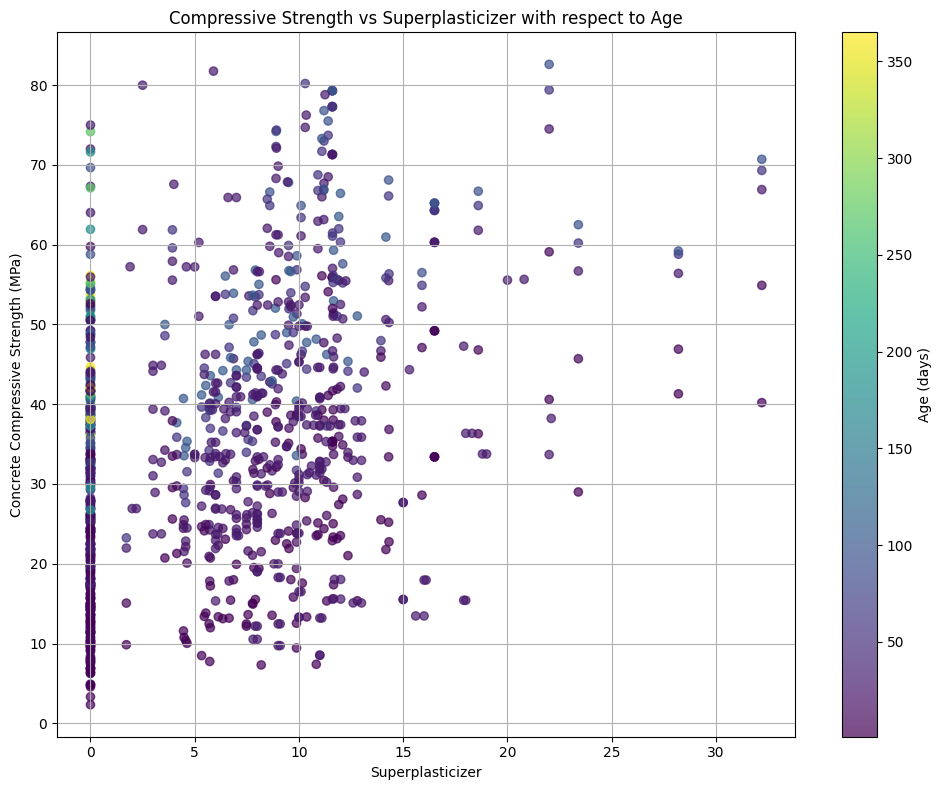

In [25]:
# Relationship between Compressive strength and Superplasticizer with respect to Age
# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Superplasticizer'], df['Concrete_Compressive_Strength'], c=df['Age_day'], cmap='viridis', alpha=0.7)

# Add color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Age (days)')

# Add labels and title
plt.xlabel('Superplasticizer')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.title('Compressive Strength vs Superplasticizer with respect to Age')

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

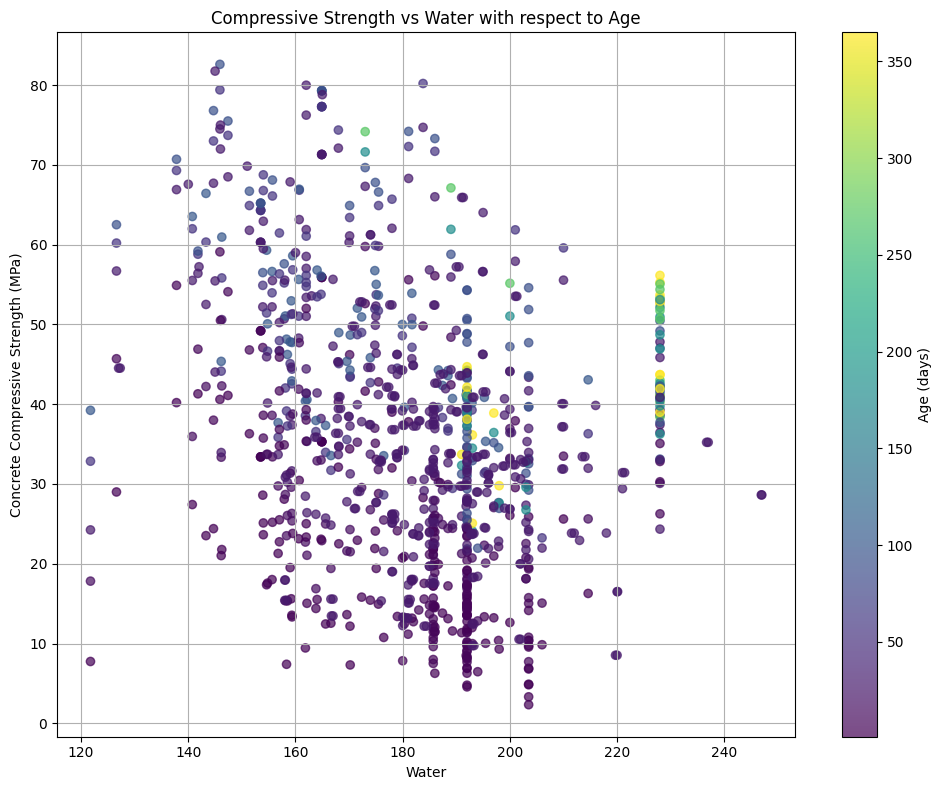

In [26]:
# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Water'], df['Concrete_Compressive_Strength'], c=df['Age_day'], cmap='viridis', alpha=0.7)

# Add color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Age (days)')

# Add labels and title
plt.xlabel('Water')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.title('Compressive Strength vs Water with respect to Age')

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

## Model Creation(data_1)

In [27]:
df.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Concrete_Compressive_Strength',
       'Age_day'],
      dtype='object')

In [28]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df,target='Concrete_Compressive_Strength', train_size=0.8, test_size=0.10, valid_size=0.10, random_state=42)
print(X_train.shape)
print(y_train.shape)

(824, 8)
(824,)


In [29]:
filepath = 'Data1'


# Constructing file paths
X_train_path = os.path.join(filepath, 'X_train.csv')
y_train_path = os.path.join(filepath, 'y_train.csv')
X_valid_path = os.path.join(filepath, 'X_valid.csv')
y_valid_path = os.path.join(filepath, 'y_valid.csv')
X_test_path = os.path.join(filepath, 'X_test.csv')
y_test_path = os.path.join(filepath, 'y_test.csv')

# Saving data to constructed paths
X_train.to_csv(X_train_path, index=False)
y_train.to_csv(y_train_path, index=False)
X_valid.to_csv(X_valid_path, index=False)
y_valid.to_csv(y_valid_path, index=False)
X_test.to_csv(X_test_path, index=False)
y_test.to_csv(y_test_path, index=False)


In [30]:
# Read CSV files using constructed paths
X_train = pd.read_csv(X_train_path)
y_train = pd.read_csv(y_train_path)
X_valid = pd.read_csv(X_valid_path)
y_valid = pd.read_csv(y_valid_path)
X_test = pd.read_csv(X_test_path)
y_test = pd.read_csv(y_test_path)

# Ensuring y data is 1D array
y_train = y_train.values.ravel()
y_valid = y_valid.values.ravel()
y_test = y_test.values.ravel()

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(824, 8)
(824,)
(103, 8)
(103,)
(103, 8)
(103,)


In [31]:
# Initialize and train the LGBMRegressor model
light_gbm = lgbm()
light_gbm.fit(X_train, y_train)  

# Predictions for the train set
train_pred = light_gbm.predict(X_train)

print('Prediction for train set')
print('MAE is', mean_absolute_error(y_train, train_pred))
print('MSE is', mean_squared_error(y_train, train_pred))
print('RMSE is', np.sqrt(mean_squared_error(y_train, train_pred)))
print('R_Sqd is', r2_score(y_train, train_pred))
print('Cor is', math.sqrt(r2_score(y_train, train_pred)))

print("")

# Predictions for the valid set
valid_pred = light_gbm.predict(X_valid)

print('Prediction for valid set')
print('MAE is', mean_absolute_error(y_valid, valid_pred))
print('MSE is', mean_squared_error(y_valid, valid_pred))
print('RMSE is', np.sqrt(mean_squared_error(y_valid, valid_pred)))
print('R_Sqd is', r2_score(y_valid, valid_pred))
print('Cor is', math.sqrt(r2_score(y_valid, valid_pred)))

print("")

# Predictions for the test set
test_pred = light_gbm.predict(X_test)

print('Prediction for test set')
print('MAE is', mean_absolute_error(y_test, test_pred))
print('MSE is', mean_squared_error(y_test, test_pred))
print('RMSE is', np.sqrt(mean_squared_error(y_test, test_pred)))
print('R_Sqd is', r2_score(y_test, test_pred))
print('Cor is', math.sqrt(r2_score(y_test, test_pred)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 8
[LightGBM] [Info] Start training from score 35.857718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [32]:
filename='savedmodel.sav'
pickle.dump(light_gbm, open(filename, 'wb'))

In [33]:
df.head(5)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Concrete_Compressive_Strength,Age_day
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,79.986111,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,61.887366,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,40.269535,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,41.052780,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,44.296075,360


In [34]:
# Initialize and train the Random Forest Regressor model
rgbm = rf(max_depth=20, max_features='log2',min_samples_leaf=1, min_samples_split=2, n_estimators=50)
rgbm.fit(X_train, y_train)  

# Predictions for the train set
train_pred = rgbm.predict(X_train)

print('Prediction for train set')
print('MAE is', mean_absolute_error(y_train, train_pred))
print('MSE is', mean_squared_error(y_train, train_pred))
print('RMSE is', np.sqrt(mean_squared_error(y_train, train_pred)))
print('R_Sqd is', r2_score(y_train, train_pred))
print('Cor is', math.sqrt(r2_score(y_train, train_pred)))

print("")

# Predictions for the valid set
valid_pred = rgbm.predict(X_valid)

print('Prediction for valid set')
print('MAE is', mean_absolute_error(y_valid, valid_pred))
print('MSE is', mean_squared_error(y_valid, valid_pred))
print('RMSE is', np.sqrt(mean_squared_error(y_valid, valid_pred)))
print('R_Sqd is', r2_score(y_valid, valid_pred))
print('Cor is', math.sqrt(r2_score(y_valid, valid_pred)))

print("")

# Predictions for the test set
test_pred2 = rgbm.predict(X_test)

print('Prediction for test set')
print('MAE is', mean_absolute_error(y_test, test_pred2))
print('MSE is', mean_squared_error(y_test, test_pred2))
print('RMSE is', np.sqrt(mean_squared_error(y_test, test_pred2)))
print('R_Sqd is', r2_score(y_test, test_pred2))
print('Cor is', math.sqrt(r2_score(y_test, test_pred2)))

Prediction for train set
MAE is 1.3844619241502247
MSE is 4.287115408098871
RMSE is 2.0705350535788742
R_Sqd is 0.9849089193862213
Cor is 0.9924257752528505

Prediction for valid set
MAE is 3.6404786863693843
MSE is 29.416796326772328
RMSE is 5.423725318152859
R_Sqd is 0.8818852895472311
Cor is 0.9390874770473894

Prediction for test set
MAE is 3.9983568302604295
MSE is 30.637760036346027
RMSE is 5.5351386645996525
R_Sqd is 0.8777961348457376
Cor is 0.9369077515133161


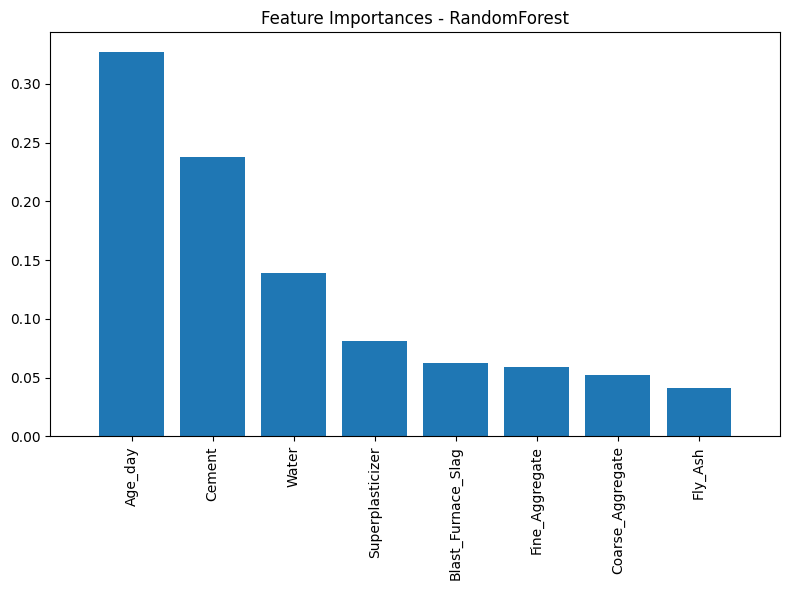

In [35]:
# feature importance 
feature_importances=rgbm.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
feature_names=X_train.columns
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.title("Feature Importances - RandomForest")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [36]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10,50,100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [1, 2, 3, 5],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the RandomForestRegressor
rf_regressor = rf(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters found by grid search:", best_params)


KeyboardInterrupt: 

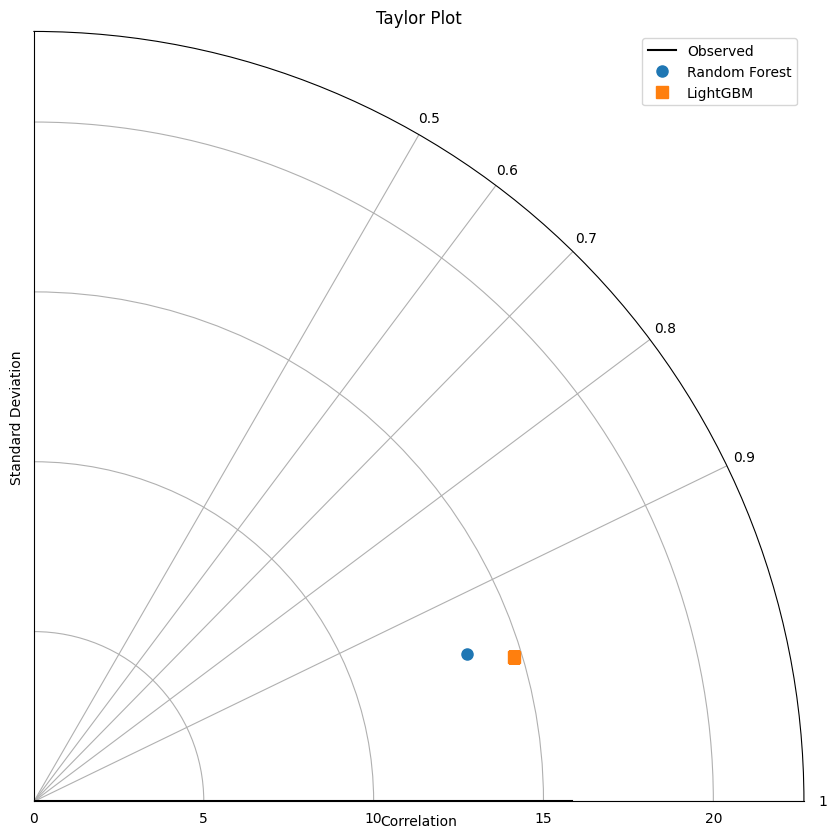

In [37]:
# Observations and model predictions
y_test = np.array(y_test)  # Ensure y_test is an array
test_pred_rf = np.array(test_pred2)  # Predictions from Random Forest
test_pred_lgbm = np.array(test_pred)  # Predictions from LightGBM

# Calculate statistics for Random Forest
std_obs_rf = np.std(y_test)
std_pred_rf = np.std(test_pred_rf)
corr_coef_rf = np.corrcoef(y_test, test_pred_rf)[0, 1]
rmse_rf = np.sqrt(mean_squared_error(y_test, test_pred_rf))

# Calculate statistics for LightGBM
std_obs_lgbm = np.std(y_test)
std_pred_lgbm = np.std(test_pred_lgbm)
corr_coef_lgbm = np.corrcoef(y_test, test_pred_lgbm)[0, 1]
rmse_lgbm = np.sqrt(mean_squared_error(y_test, test_pred_lgbm))

# Convert correlation coefficients to radians for the polar plot
corr_rad_rf = np.arccos(corr_coef_rf)
corr_rad_lgbm = np.arccos(corr_coef_lgbm)

# Create the plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)

# Plot the reference standard deviation (observed)
ax.plot([0, 0], [0, std_obs_rf], color='black', linestyle='-', label='Observed')

# Plot the Random Forest model's performance
ax.plot(corr_rad_rf, std_pred_rf, 'o', label='Random Forest', markersize=8)

# Plot the LightGBM model's performance
ax.plot(corr_rad_lgbm, std_pred_lgbm, 's', label='LightGBM', markersize=8)

# Set up the plot
ax.set_ylim(0, max(std_pred_rf, std_pred_lgbm) + std_obs_rf * 0.5)
ax.set_xlim(0, np.pi / 2)
ax.set_xticks(np.arccos([1, 0.9, 0.8, 0.7, 0.6, 0.5]))
ax.set_xticklabels(['1', '0.9', '0.8', '0.7', '0.6', '0.5'])

# Labels and title
ax.set_xlabel('Correlation')
ax.set_ylabel('Standard Deviation')
ax.set_title('Taylor Plot')

# Add a legend
plt.legend()

# Show plot
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 8
[LightGBM] [Info] Start training from score 11.367011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

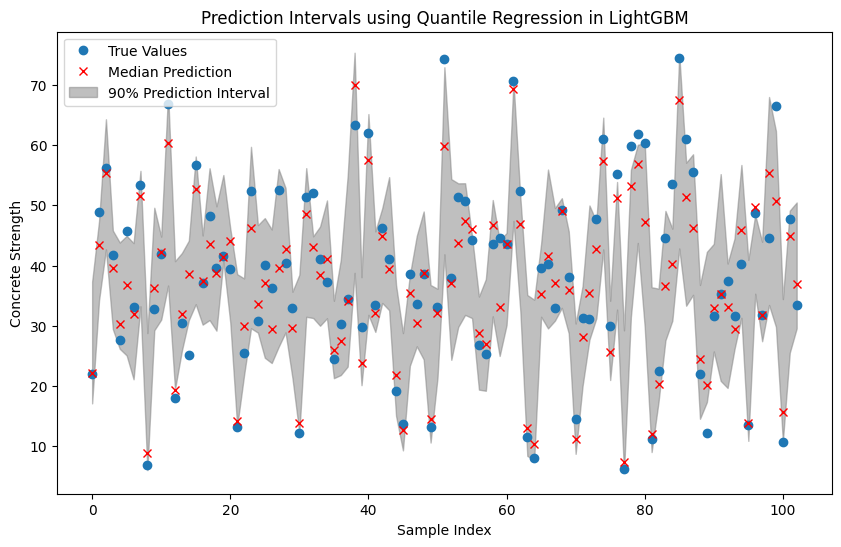

In [38]:
#Uncertainity analaysis for light boost
# Define quantiles for prediction
quantiles = [0.05, 0.5, 0.95]


# Dictionary to store models for each quantile
lgb_models = {}
predictions = {}

for quantile in quantiles:
    params = {
        'objective': 'quantile',
        'alpha': quantile,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'n_estimators': 100
    }
    
    lgb_model = lgbm(**params)
    lgb_model.fit(X_train, y_train)
    predictions[quantile] = lgb_model.predict(X_test)

# Extracting the median prediction and intervals
median_pred = predictions[0.5]
lower_pred = predictions[0.05]
upper_pred = predictions[0.95]

# Evaluate or visualize the prediction intervals
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, 'o', label='True Values')
plt.plot(range(len(y_test)), median_pred, 'rx', label='Median Prediction')
plt.fill_between(range(len(y_test)), lower_pred, upper_pred, color='gray', alpha=0.5, label='90% Prediction Interval')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Concrete Strength')
plt.title('Prediction Intervals using Quantile Regression in LightGBM')
plt.show()


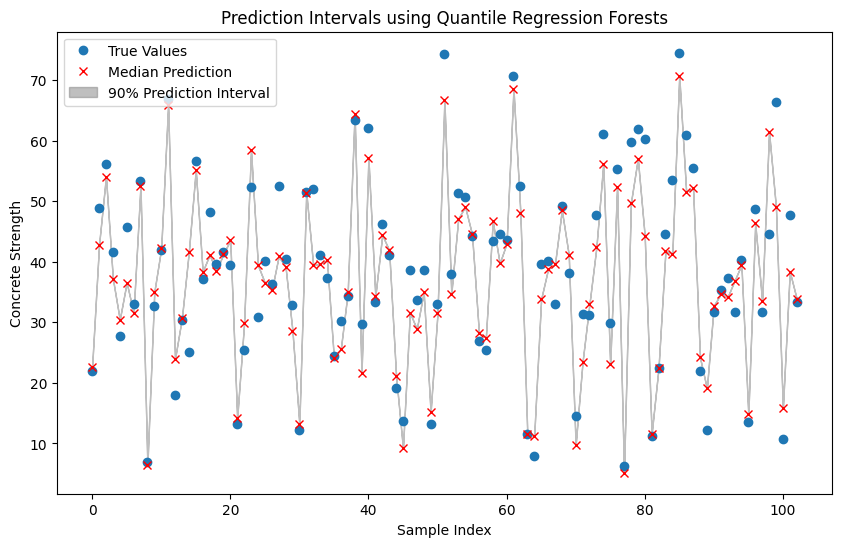

In [39]:
# Train a Quantile Regression Forest
qrf = rf(n_estimators=100, random_state=42)
qrf.fit(X_train, y_train)

# Predict quantiles (e.g., 5th, 50th, and 95th percentiles)
quantiles = [0.05, 0.5, 0.95]
predictions = {}

for quantile in quantiles:
    predictions[quantile] = qrf.predict(X_test)

# Extracting the median prediction and intervals
median_pred = predictions[0.5]
lower_pred = predictions[0.05]
upper_pred = predictions[0.95]

# Evaluate or visualize the prediction intervals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, 'o', label='True Values')
plt.plot(range(len(y_test)), median_pred, 'rx', label='Median Prediction')
plt.fill_between(range(len(y_test)), lower_pred, upper_pred, color='gray', alpha=0.5, label='90% Prediction Interval')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Concrete Strength')
plt.title('Prediction Intervals using Quantile Regression Forests')
plt.show()
